In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from scipy.misc import imread
import os 
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import random
import glob
import scipy.cluster.hierarchy as hac
from sklearn import mixture

In [80]:
MA_location = {"Greater_Boston_Area" : 0,
         "Salem" : 0, 
         "Plymouth" : 0, 
         "Waltham" : 0, 
         "Framingham" : 0,
         "Worcester" : 0,
         "Lexington" : 0,
         "Danvers" : 0,
        }
Greater_Boston_Area = {"Boston" : 0, 
                       "Providence" : 0, 
                       "Lowell" : 0, 
                       "Cambridge" : 0, 
                       "Quincy" : 0,
                       "Newton" : 0
                      }
city_detail = [400, 700, 200, 600]
cwd = os.getcwd()

In [81]:
def read_company_csv(file_name, result):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in Greater_Boston_Area):
                row[2] = "Greater_Boston_Area"
                result.append(row)
            elif (row[2] in MA_location):
                result.append(row)

In [82]:
def read_company_location_csv(file_name):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in Greater_Boston_Area):
                MA_location["Greater_Boston_Area"]+=1
            elif (row[2] in MA_location):
                MA_location[row[2]]+=1

In [83]:
location = []
path = cwd + "/Company"
files = os.listdir(path)
for file_name in files:
    read_company_location_csv(file_name)

In [84]:
print(MA_location)

{'Framingham': 190, 'Greater_Boston_Area': 7545, 'Waltham': 281, 'Danvers': 171, 'Salem': 101, 'Worcester': 813, 'Lexington': 567, 'Plymouth': 103}


In [85]:
datafile = cbook.get_sample_data(cwd + '/massachusetts.jpg')
img = imread(datafile)

In [86]:
MA_Cities_Coordinates = {"Greater_Boston_Area" : [550, 410, 6000, 'red'],
                        "Worcester" : [380, 400, 1000, 'blue'],
                        "Lexington" : [500, 440, 900, 'green'],
                        "Waltham" : [500, 405, 800, 'black'],
                        "Framington" : [465, 395, 700, 'yellow'],
                        "Danvers" : [480, 480, 600, 'brown'],
                        "Plymouth" : [600, 300, 500, 'pink'],
                        "Salem" : [580, 460, 400, 'grey']}

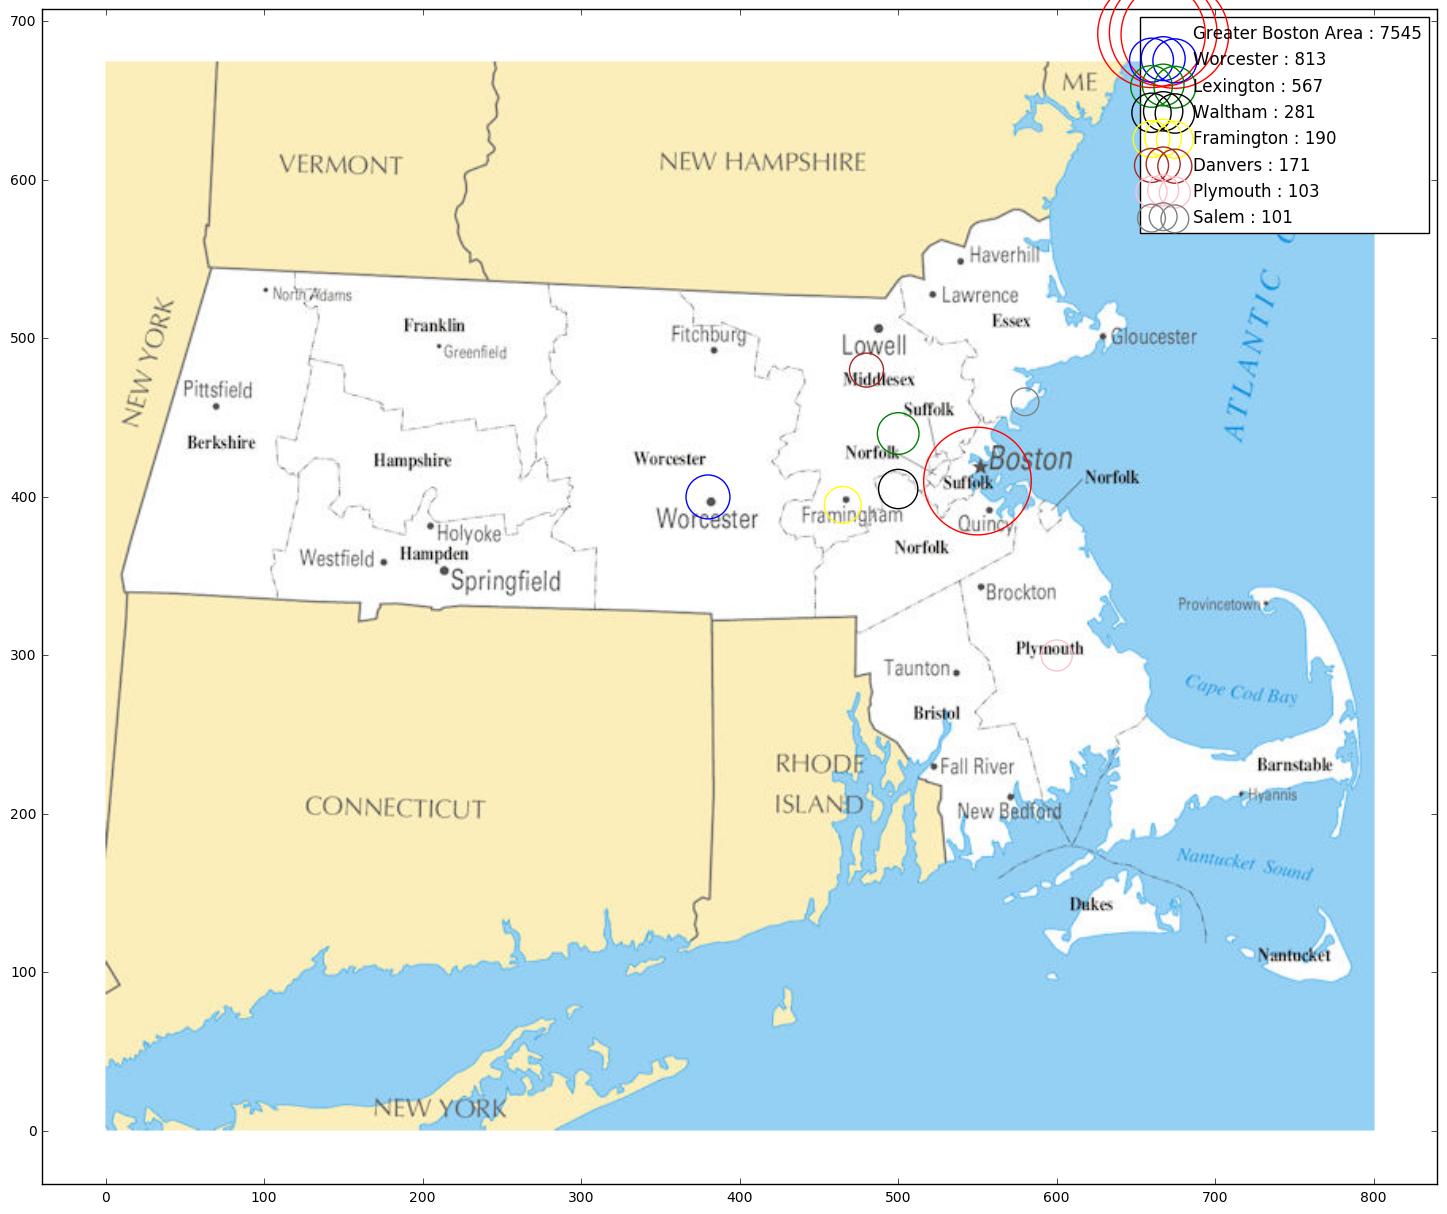

In [87]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 800, 0, 674])
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange']
# Greater Boston Area 7545
plta = plt.scatter(550, 410, s=6000, facecolors='none', edgecolors='red')
# Worcester 813
pltb = plt.scatter(380, 400, s=1000, facecolors='none', edgecolors='blue')
# Lexington 567
pltc = plt.scatter(500, 440, s=900, facecolors='none', edgecolors='green')
# Waltham 281
pltd = plt.scatter(500, 405, s=800, facecolors='none', edgecolors='black')
# Framington 190
plte = plt.scatter(465, 395, s=700, facecolors='none', edgecolors='yellow')
# Danvers 171
pltf = plt.scatter(480, 480, s=600, facecolors='none', edgecolors='brown')
# Plymouth 103
pltg = plt.scatter(600, 300, s=500, facecolors='none', edgecolors='pink')
# Salem 101
plth = plt.scatter(580, 460, s=400, facecolors='none', edgecolors='grey')
# 
# plt.scatter(x = 100, y = 100, color = 'red', s = 20)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth), 
           ("Greater Boston Area : 7545", 
            "Worcester : 813", 
            "Lexington : 567", 
            "Waltham : 281", 
            "Framington : 190",
            "Danvers : 171",
            "Plymouth : 103",
            "Salem : 101"))
plt.show()

In [101]:
result = []
path = cwd + "/Company"
files = os.listdir(path)
for file_name in files:
    read_company_csv(file_name, result)

In [102]:
str_list = []
for x in result:
    str1 = x[1].replace(" ", "_") + " " + x[2]
    str_list.append(str1)

In [103]:
vectorizer = TfidfVectorizer(min_df = 1)
D = vectorizer.fit_transform(str_list)

In [104]:
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_predict = kmeans.fit_predict(D)

In [105]:
print("K means")
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print('')

K means
Top terms per cluster:
Cluster 0:
 patient_care_associate
 greater_boston_area
 critical_care_technician
 worcester
 zumba
 corporate_account_manager
 corp_actions_spec
 core_lab_research_assistant
 coordinator_of_patient_placement
 coordinator

Cluster 1:
 worcester
 medical_technologist
 administrative_assistant
 lpn
 executive_administrative_assistant
 sr
 medical_assistant
 research_assistant
 registered_respiratory_therapist
 unit_secretary

Cluster 2:
 lexington
 security_guard
 senior_technical_documentation_specialist
 project_manager
 _command_
 _control
 feeder_supervisor
 director_of_health_services
 assembly_line_worker
 center_director

Cluster 3:
 framingham
 engineer
 test_engineer
 op
 systems_manager
 member_services_representative
 service_manager
 senior_controls_technician
 cashier
 childhood_educator_

Cluster 4:
 waltham
 principal_linux_engineer
 manager
 senior_internal_auditor
 customer_engagement_specialist
 toddler_teacher
 user_applications_liaison
 

In [43]:
z = hac.linkage(D.toarray(), 'ward')
print(z)

[[  0.00000000e+00   1.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  4.80100000e+03   4.82000000e+03   0.00000000e+00   2.00000000e+00]
 [  5.01000000e+03   9.77200000e+03   0.00000000e+00   3.00000000e+00]
 ..., 
 [  1.95190000e+04   1.95370000e+04   1.75077850e+01   8.88800000e+03]
 [  1.95360000e+04   1.95380000e+04   1.89520684e+01   9.57300000e+03]
 [  1.40440000e+04   1.95390000e+04   1.92394927e+01   9.77100000e+03]]


In [ ]:
z = hac.linkage(D.toarray(), 'ward')
T = hac.fcluster(z, 10, 'maxclust')
hierarchy_result = [None]*10
for i in range(0, len(T)):
    if (hierarchy_result[T[i]-1] is None):
        hierarchy_result[T[i]-1] = []
    else:
        if (parsed_data[i]['categories'][0] in hierarchy_result[T[i] - 1]):
            continue
        hierarchy_result[T[i]-1].append(str_list[i]['categories'][0])

In [ ]:
# print("Hierarchy Cluster")
# print("Top terms per cluster:")

# for i in range(10):
#     print("Cluster {}:".format(i))
#     new_result = hierarchy_result[i]
#     for ind in new_result[0: 3]:
#         print(' {}'.format(ind))
#     print('')

In [ ]:
# print("GMM Cluster")
# print("Top terms per cluster:")

# for i in range(9):
#     print("Cluster {}:".format(i))
#     new_result = gmm_result[i]
#     for ind in new_result[0: 5]:
#         print(' {}'.format(ind))
#     print('')

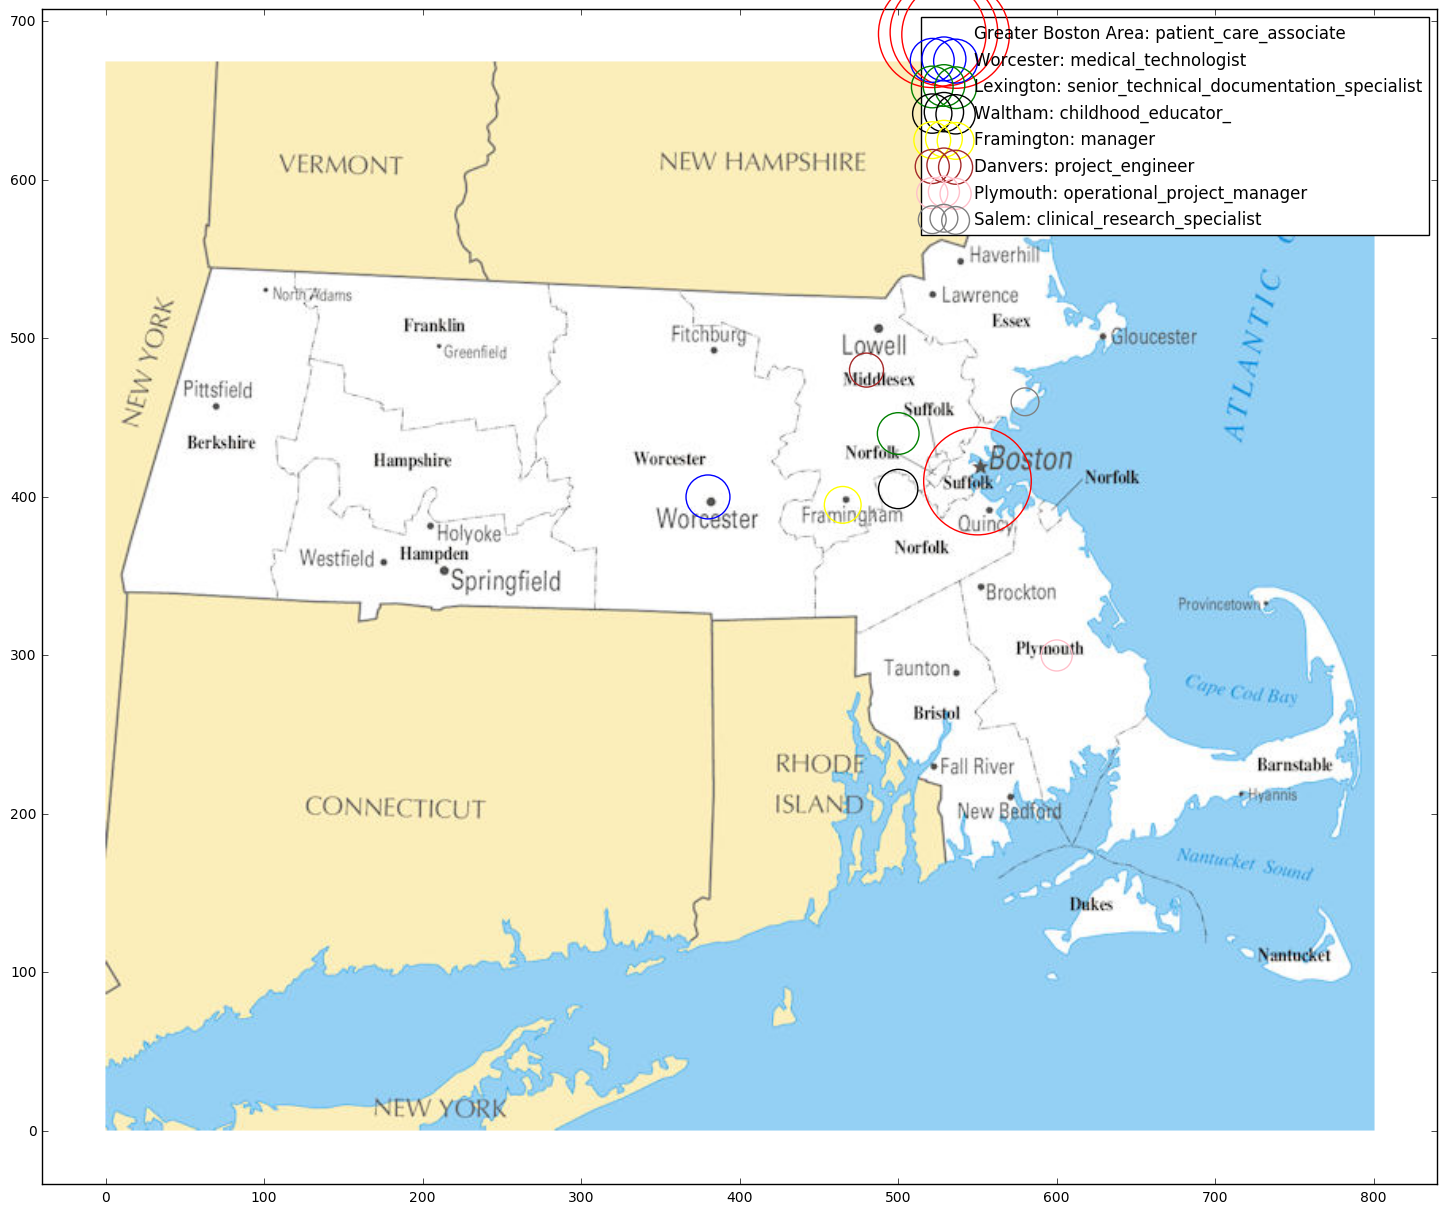

In [108]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 800, 0, 674])
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange']
# Greater Boston Area 7545
plta = plt.scatter(550, 410, s=6000, facecolors='none', edgecolors='red')
# Worcester 813
pltb = plt.scatter(380, 400, s=1000, facecolors='none', edgecolors='blue')
# Lexington 567
pltc = plt.scatter(500, 440, s=900, facecolors='none', edgecolors='green')
# Waltham 281
pltd = plt.scatter(500, 405, s=800, facecolors='none', edgecolors='black')
# Framington 190
plte = plt.scatter(465, 395, s=700, facecolors='none', edgecolors='yellow')
# Danvers 171
pltf = plt.scatter(480, 480, s=600, facecolors='none', edgecolors='brown')
# Plymouth 103
pltg = plt.scatter(600, 300, s=500, facecolors='none', edgecolors='pink')
# Salem 101
plth = plt.scatter(580, 460, s=400, facecolors='none', edgecolors='grey')
# 
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth), 
           ("Greater Boston Area: " + terms[order_centroids[0, 0]], 
            "Worcester: " + terms[order_centroids[1, 1]], 
            "Lexington: " + terms[order_centroids[2, 2]], 
            "Waltham: " + terms[order_centroids[3, 9]],
            "Framington: " + terms[order_centroids[4, 2]],
            "Danvers: " + terms[order_centroids[5, 4]],
            "Plymouth: " + terms[order_centroids[6, 0]],
            "Salem: " + terms[order_centroids[7, 3]]))
plt.show()

In [51]:
def read_company_csv_in_greater_boston_area(file_name, result):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in Greater_Boston_Area):
                row[2] = "Greater_Boston_Area"
                result.append(row)

In [56]:
from collections import OrderedDict
result = []
path = cwd + "/Company"
files = os.listdir(path)
for file_name in files:
    read_company_csv_in_greater_boston_area(file_name, result)

greater_boston_area_job_dict = {}
for x in result:
    myStr = x[1].replace(" ", "_") + " "
    if (myStr in greater_boston_area_job_dict):
        greater_boston_area_job_dict[myStr]+=1
    else:
        greater_boston_area_job_dict[myStr] = 1

ordered_dic = OrderedDict(sorted(greater_boston_area_job_dict.items(), 
                                 key=lambda x: x[1], 
                                 reverse = True))


In [60]:
result = []
for key, value in ordered_dic.items():
    result.append([key, value])
    if (len(result) == 10):
        break

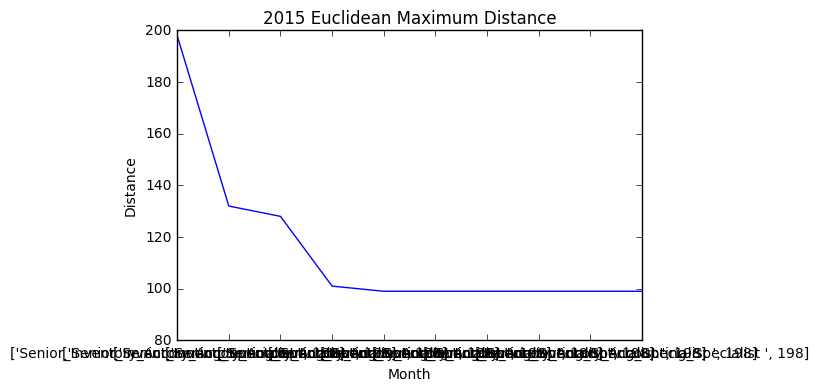

In [64]:
y = []
for i in result:
    y.append(i[1])

N = len(y)
x = range(N)

for i in result:
    labels.append(i[0])

plt.plot(x, y, color = 'blue')
plt.xticks(x, labels)
plt.xlabel('Month')
plt.ylabel('Distance')
plt.title("2015 Euclidean Maximum Distance")
plt.show()

Senior_Inventory_Accounting_Specialist 
Patient_Services_Specialist 
Treasury_Solutions_Advisor 
Project_Engineer 
Financial_Advisor 
Brand_Ambassador 
INSIDE_SALES_REP 
Claims_Processor 
Laboratory_Coordinator 
Sales_Associate/Cashier 


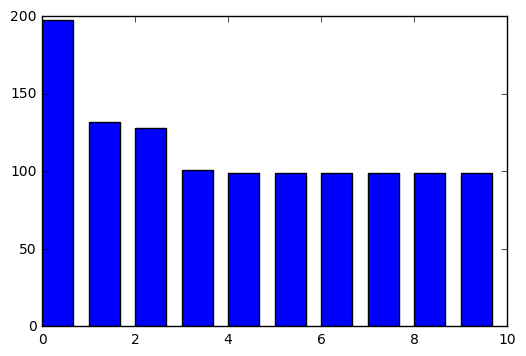

In [69]:
y = []
for i in result:
    y.append(i[1])

for i in result:
    print("#" + (i + 1) + ": " + i[0])
    
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

# fig = plt.gcf()
# plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')